In [18]:
import numpy as np
import matplotlib.pyplot as plt
import graph_tool.all as gt
import networkx as nx
#
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.linalg import expm
from scipy.spatial.distance import squareform

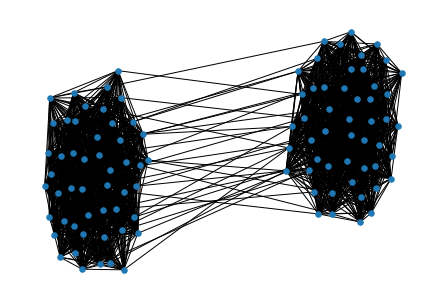

In [32]:
# stochastich bloc model graph generation
sizes = [50, 50]
probs = [[0.75, 0.01], [0.01, 0.75]]
ord_sbm = nx.stochastic_block_model(sizes, probs, seed=1)
nx.draw(ord_sbm, node_size=30)

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


ValueError: Distance matrix 'X' must be symmetric.

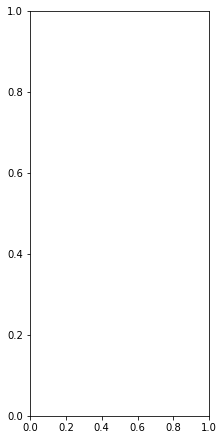

In [22]:
ax_dict = plt.figure(constrained_layout=True,figsize=(3,6)).subplot_mosaic(
    """
     A
    """
)
Th = 0.1

L = nx.laplacian_matrix(ord_sbm)
L1 = L.todense()
w = 1. / nx.laplacian_spectrum(ord_sbm)

tau = w[0]
num = expm((-tau * L1))
den = np.trace(num)
rho = num/den
rho_inv = np.copy(1.0 / rho)
rho_inv = np.maximum(rho_inv, rho_inv.transpose())
np.fill_diagonal(rho_inv, 0)

dists = squareform(rho_inv)
linkage_matrix = linkage(dists, "average")
labelList = [i+1 for i in range(0, len(ord_sbm.nodes()))]
tmax = linkage_matrix[::, 2][-1]# +0.01*linkage_matrix[::, 2][-1]

dendrogram(linkage_matrix, labels=labelList, ax=ax_dict['A'], leaf_rotation=0,
           orientation='right',color_threshold=Th,
           above_threshold_color='k',leaf_font_size=10
)


In [28]:
tau

-35184372088832.0

In [9]:
# g = gt.collection.data["polblogs"]
# g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
# g = gt.Graph(g, prune=True)
# state = gt.minimize_blockmodel_dl(g)
# u = gt.generate_sbm(state.b.a, gt.adjacency(state.get_bg(),
#                                             state.get_ers()).T,
#                     g.degree_property_map("out").a,
#                     g.degree_property_map("in").a, directed=True)
# gt.graph_draw(g, g.vp.pos, output="polblogs-sbm.pdf")
# gt.graph_draw(u, u.own_property(g.vp.pos), output="polblogs-sbm-generated.pdf")

# state.get_bg(), state.get_ers()

# N = 100
# group = np.random.randint(0, 2, size=N)
# sbm = gt.Graph(np.random.random((N, N)), directed=False)

# state = gt.minimize_blockmodel_dl(sbm)


# N = 100
# # group = np.random.randint(0, 2, size=N)
# sizes = np.array([50, 50])
# probs = np.array([[0.85, 0.05], [0.05, 0.85]])
# u = gt.generate_sbm(sizes, probs, directed=False)
# gt.graph_draw(u, output="test-sbm.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f0a9a15a530, at 0x7f0a9a1f6500>